In [2]:
# Import
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import  Activation,Dense, Conv2D, MaxPooling2D , Flatten, AveragePooling2D
from keras import optimizers
from keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy

2025-05-29 21:22:40.612475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748528560.629122 1117525 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748528560.633858 1117525 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748528560.646976 1117525 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748528560.647000 1117525 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748528560.647003 1117525 computation_placer.cc:177] computation placer alr

In [3]:
# Load Dataset
(X,y),(X_test,y_test) = datasets.cifar10.load_data()
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,train_size=0.8)

# Normalize 
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

categories = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships","trucks"]

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2025-05-29 07:35:53.722175: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 07:35:54.160355: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - F1Score: 0.1951 - accuracy: 0.2793 - loss: 1.9059 - val_F1Score: 0.1954 - val_accuracy: 0.5463 - val_loss: 1.2569
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.5914 - loss: 1.1366 - val_F1Score: 0.1954 - val_accuracy: 0.6541 - val_loss: 0.9912
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.7006 - loss: 0.8513 - val_F1Score: 0.1955 - val_accuracy: 0.7133 - val_loss: 0.8194
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.7699 - loss: 0.6490 - val_F1Score: 0.1956 - val_accuracy: 0.7606 - val_loss: 0.6947
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - F1Score: 0.1956 - accuracy: 0.8178 - loss: 0.5185 - val_F1Score: 0.1955 - val_accuracy: 0.7627 - val_loss: 0.7111
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - F1Score: 0.1956 - accuracy: 0.8586 - loss: 0.3978 - val_F1Score: 0.1955 - val_accuracy: 0.7648 - val_loss

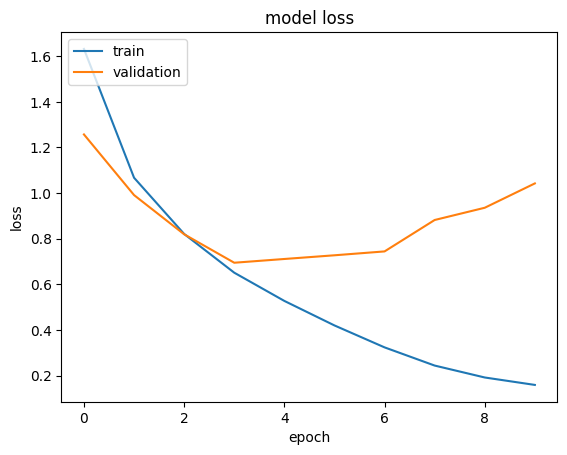

In [25]:
# Model 1: Baseline

model1 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model1.save_weights("model1.weights.h5")

# Grafik Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - F1Score: 0.1950 - accuracy: 0.3586 - loss: 1.7255 - val_F1Score: 0.1951 - val_accuracy: 0.5809 - val_loss: 1.1876
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.6254 - loss: 1.0593 - val_F1Score: 0.1955 - val_accuracy: 0.6641 - val_loss: 0.9614
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.7133 - loss: 0.8210 - val_F1Score: 0.1954 - val_accuracy: 0.7138 - val_loss: 0.8299
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.7659 - loss: 0.6756 - val_F1Score: 0.1955 - val_accuracy: 0.7374 - val_loss: 0.7743
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.8063 - loss: 0.5490 - val_F1Score: 0.1956 - val_accuracy: 0.7511 - val_loss: 0.7517
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - F1Score: 0.1956 - accuracy: 0.8475 - loss: 0.4390 - val_F1Score: 0.1956 - val_accuracy: 0.7505 - val_

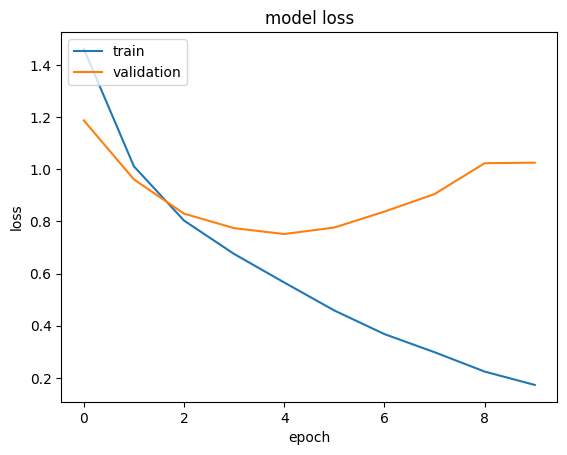

In [27]:
# Model 2: Less Conv Layer

model2 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model2.save_weights("model2.weights.h5")

# Grafik Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - F1Score: 0.1934 - accuracy: 0.2207 - loss: 2.0572 - val_F1Score: 0.1953 - val_accuracy: 0.4657 - val_loss: 1.4524
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.5064 - loss: 1.3547 - val_F1Score: 0.1952 - val_accuracy: 0.5814 - val_loss: 1.1440
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.6161 - loss: 1.0867 - val_F1Score: 0.1954 - val_accuracy: 0.6609 - val_loss: 0.9682
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.6860 - loss: 0.8733 - val_F1Score: 0.1953 - val_accuracy: 0.6839 - val_loss: 0.8820
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.7436 - loss: 0.7209 - val_F1Score: 0.1956 - val_accuracy: 0.7002 - val_loss: 0.8597
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - F1Score: 0.1956 - accuracy: 0.7923 - loss: 0.5881 - val_F1Score: 0.1956 - val_accuracy: 0.7346

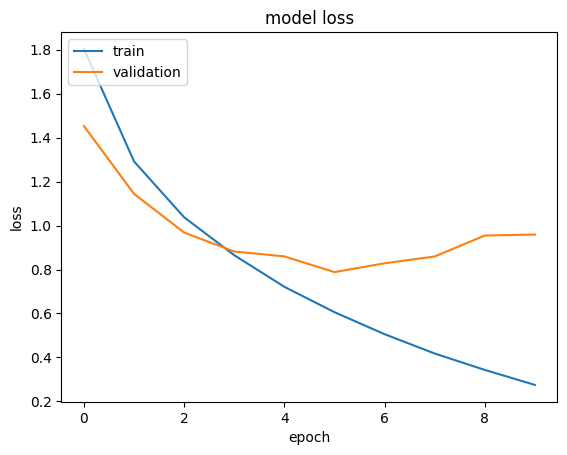

In [28]:
# Model 3: More Conv Layer

model3 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history3 = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model3.save_weights("model3.weights.h5")

# Grafik Loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748527577.247217 1097737 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


2025-05-29 21:06:18.710978: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 21:06:19.253845: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
I0000 00:00:1748527581.367274 1098520 service.cc:152] XLA service 0x752dac004a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748527581.367293 1098520 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-29 21:06:21.427824: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748527581.800527 1098520 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-05-29 21:06:22.489264: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning

  2/625 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - F1Score: 0.1709 - accuracy: 0.0664 - loss: 2.3682   

I0000 00:00:1748527590.395087 1098520 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - F1Score: 0.1941 - accuracy: 0.2831 - loss: 1.9160

2025-05-29 21:06:58.711646: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-05-29 21:06:58.819144: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-05-29 21:07:00.131067: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 424.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-29 21:07:00.323157: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 764.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-29 21:07:04.228155: W external/local_xla/xla/tsl/frame

625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - F1Score: 0.1941 - accuracy: 0.2835 - loss: 1.9151 - val_F1Score: 0.1956 - val_accuracy: 0.5700 - val_loss: 1.1845
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - F1Score: 0.1956 - accuracy: 0.5940 - loss: 1.1378 - val_F1Score: 0.1955 - val_accuracy: 0.6723 - val_loss: 0.9233
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - F1Score: 0.1956 - accuracy: 0.7058 - loss: 0.8269 - val_F1Score: 0.1957 - val_accuracy: 0.7249 - val_loss: 0.7812
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - F1Score: 0.1956 - accuracy: 0.7726 - loss: 0.6456 - val_F1Score: 0.1957 - val_accuracy: 0.7482 - val_loss: 0.7394
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - F1Score: 0.1956 - accuracy: 0.8239 - loss: 0.4985 - val_F1Score: 0.1954 - val_accuracy: 0.7649 - val_loss: 0.6965
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - F1Score: 0.1956 - accuracy: 0.8735 - loss: 0.3515 - val_F1Score: 0.1956 - val_accuracy: 0.7665 - val_loss

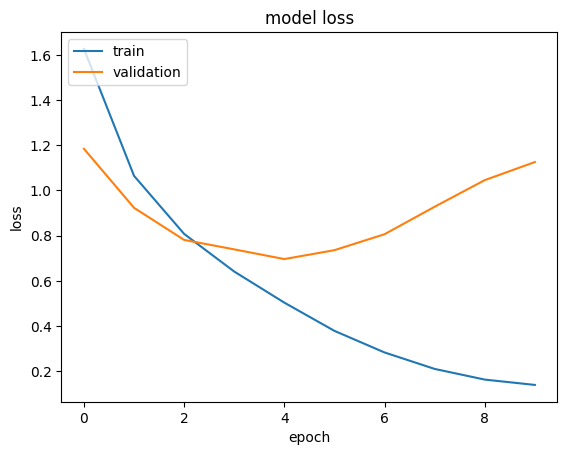

In [4]:
# Model 4: More filter per layer

model4 = Sequential([
    Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history4 = model4.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model4.save_weights("model4.weights.h5")

# Grafik Loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/10


2025-05-29 21:15:15.105853: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - F1Score: 0.1946 - accuracy: 0.3175 - loss: 1.8268 - val_F1Score: 0.1952 - val_accuracy: 0.5577 - val_loss: 1.2039
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.5926 - loss: 1.1354 - val_F1Score: 0.1956 - val_accuracy: 0.6867 - val_loss: 0.8890
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.6999 - loss: 0.8474 - val_F1Score: 0.1956 - val_accuracy: 0.7119 - val_loss: 0.8259
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.7621 - loss: 0.6848 - val_F1Score: 0.1958 - val_accuracy: 0.7520 - val_loss: 0.7259
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.8078 - loss: 0.5473 - val_F1Score: 0.1957 - val_accuracy: 0.7514 - val_loss: 0.7150
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - F1Score: 0.1956 - accuracy: 0.8471 - loss: 0.4310 - val_F1Score: 0.1956 - val_accuracy: 0.7674 - val_loss: 0.7197
E

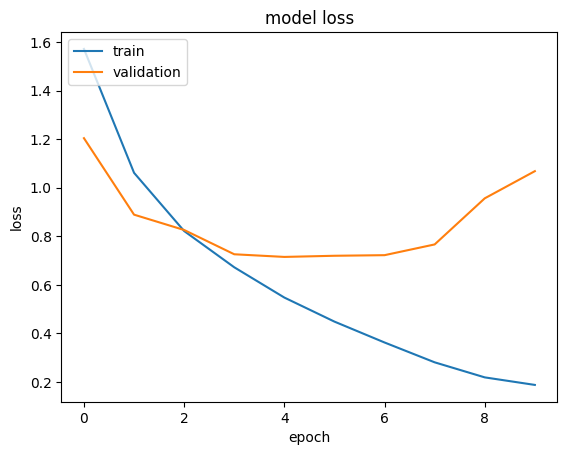

In [5]:
# Model 5: Less filter per layer

model5 = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history5 = model5.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model5.save_weights("model5.weights.h5")

# Grafik Loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748528573.394807 1117525 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-05-29 21:22:54.606453: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 21:22:55.109953: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1748528577.252981 1118805 service.cc:152] XLA service 0x78dd100030b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748528577.253000 1118805 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-29 21:22:57.293108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748528577.608273 1118805 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-05-29 21:22:58.102324: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_541', 4 bytes spill stores, 4 bytes spill loads

2025-05-29 21:22:58.687097: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_d

  5/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - F1Score: 0.1786 - accuracy: 0.1325 - loss: 2.4467 

I0000 00:00:1748528585.214819 1118805 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - F1Score: 0.1943 - accuracy: 0.2375 - loss: 2.0245 - val_F1Score: 0.1947 - val_accuracy: 0.4469 - val_loss: 1.4793
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - F1Score: 0.1955 - accuracy: 0.4851 - loss: 1.4174 - val_F1Score: 0.1951 - val_accuracy: 0.5479 - val_loss: 1.2425
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - F1Score: 0.1956 - accuracy: 0.5888 - loss: 1.1532 - val_F1Score: 0.1955 - val_accuracy: 0.6312 - val_loss: 1.0363
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - F1Score: 0.1956 - accuracy: 0.6703 - loss: 0.9356 - val_F1Score: 0.1956 - val_accuracy: 0.6636 - val_loss: 0.9500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - F1Score: 0.1956 - accuracy: 0.7209 - loss: 0.7861 - val_F1Score: 0.1954 - val_accuracy: 0.6835 - val_loss: 0.9111
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - F1Score: 0.1956 - accuracy: 0.7737 - loss: 0.6416 - val_F1Score: 0.1955 - val_accuracy: 0.6954 - val_loss

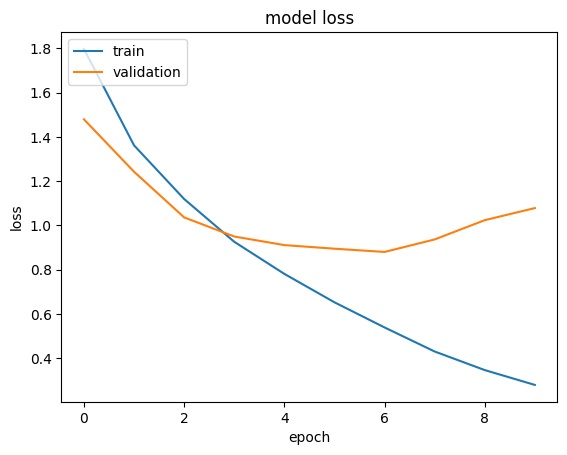

In [4]:
# Model 6: Bigger filter

model6 = Sequential([
    Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (5, 5), padding='same', activation='relu'),
    Conv2D(128, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (5, 5), padding='same', activation='relu'),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history6 = model6.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model6.save_weights("model6.weights.h5")

# Grafik Loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 21:27:40.532100: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2025-05-29 21:27:41.073451: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - F1Score: 0.1948 - accuracy: 0.3050 - loss: 1.8673 - val_F1Score: 0.1943 - val_accuracy: 0.5223 - val_loss: 1.3082
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - F1Score: 0.1956 - accuracy: 0.5858 - loss: 1.1537 - val_F1Score: 0.1954 - val_accuracy: 0.6397 - val_loss: 1.0060
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - F1Score: 0.1956 - accuracy: 0.6809 - loss: 0.8954 - val_F1Score: 0.1956 - val_accuracy: 0.6880 - val_loss: 0.8861
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - F1Score: 0.1956 - accuracy: 0.7412 - loss: 0.7414 - val_F1Score: 0.1956 - val_accuracy: 0.7252 - val_loss: 0.7843
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - F1Score: 0.1956 - accuracy: 0.7810 - loss: 0.6161 - val_F1Score: 0.1953 - val_accuracy: 0.7294 - val_loss: 0.7782
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - F1Score: 0.1956 - accuracy: 0.8202 - loss: 0.5081 - val_F1Score: 0.1956 - val_accuracy: 0.7399

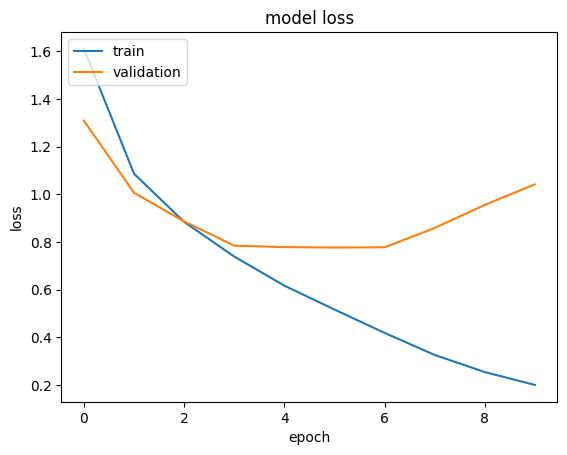

In [5]:
# Model 7: Smaller filter

model7 = Sequential([
    Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (2, 2), padding='same', activation='relu'),
    Conv2D(128, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (2, 2), padding='same', activation='relu'),
    Conv2D(256, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history7 = model7.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model7.save_weights("model7.weights.h5")

# Grafik Loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/home/hnf/.pyenv/versions/3.12.9/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - F1Score: 0.1949 - accuracy: 0.3175 - loss: 1.8365

2025-05-29 08:19:26.170263: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 424.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - F1Score: 0.1949 - accuracy: 0.3177 - loss: 1.8361 - val_F1Score: 0.1954 - val_accuracy: 0.5201 - val_loss: 1.3166
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.5682 - loss: 1.2130 - val_F1Score: 0.1956 - val_accuracy: 0.6455 - val_loss: 0.9912
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.6783 - loss: 0.9113 - val_F1Score: 0.1954 - val_accuracy: 0.6995 - val_loss: 0.8687
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.7398 - loss: 0.7346 - val_F1Score: 0.1955 - val_accuracy: 0.7297 - val_loss: 0.7683
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1956 - accuracy: 0.7813 - loss: 0.6146 - val_F1Score: 0.1956 - val_accuracy: 0.7568 - val_loss: 0.7043
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - F1Score: 0.1957 - accuracy: 0.8246 - loss: 0.4983 - val_F1Score: 0.1954 - val_accuracy: 0.7580 - val_loss

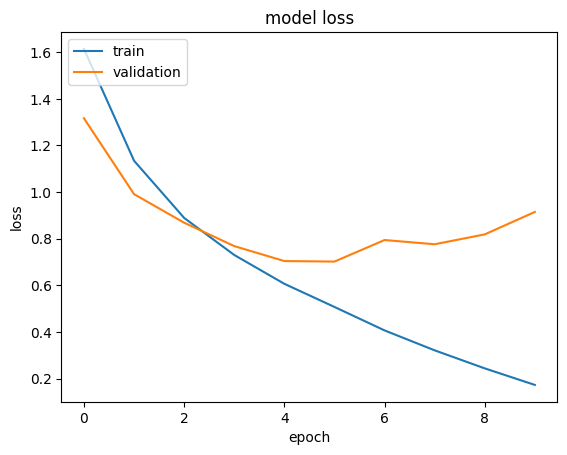

In [8]:
# Model 8: Average Pooling

model8 = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model8.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy','F1Score']
)

history8 = model8.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
model8.save_weights("model8.weights.h5")

# Grafik Loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()